In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv("D:\\1-Data Science\\2-Dataset\KNN\\Zoo.csv")
df

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [4]:
df.columns

Index(['animal name', 'hair', 'feathers', 'eggs', 'milk', 'airborne',
       'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous',
       'fins', 'legs', 'tail', 'domestic', 'catsize', 'type'],
      dtype='object')

In [5]:
df['type']

0      1
1      1
2      4
3      1
4      1
      ..
96     1
97     6
98     1
99     7
100    2
Name: type, Length: 101, dtype: int64

In [6]:
df['type'].sample(10)

22    1
18    4
75    1
8     4
56    2
70    1
57    2
37    2
53    7
76    3
Name: type, dtype: int64

In [7]:
max(df.type)

7

In [8]:
min(df.type)

1

In [9]:
df.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [11]:
df['animal name']

0      aardvark
1      antelope
2          bass
3          bear
4          boar
         ...   
96      wallaby
97         wasp
98         wolf
99         worm
100        wren
Name: animal name, Length: 101, dtype: object

In [12]:
df['animal name'].sample(10)

41        kiwi
23    flamingo
61     piranha
80    slowworm
16        crow
5      buffalo
56     ostrich
86    stingray
20        dove
4         boar
Name: animal name, dtype: object

In [13]:
df

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [14]:
df_n = df.iloc[:,1:17]
df_n

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1
97,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0
98,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
99,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0


In [15]:
len(df.columns)

18

In [16]:
def norm_funt(i):
    x = (i-i.min())/(i.max()-i.min())
    return x

In [17]:
df_x = norm_funt(df_n)
df_x

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.50,0.0,0.0,1.0
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.50,1.0,0.0,1.0
2,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.00,1.0,0.0,0.0
3,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.50,0.0,0.0,1.0
4,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.50,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.25,1.0,0.0,1.0
97,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.75,0.0,0.0,0.0
98,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.50,1.0,0.0,1.0
99,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.00,0.0,0.0,0.0


In [18]:
X = np.array(df_x)
X

array([[1., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 1., 0., 1.],
       [0., 0., 1., ..., 1., 0., 0.],
       ...,
       [1., 0., 0., ..., 1., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 1., 0., 0.]])

In [19]:
y = np.array(df['type'])
y

array([1, 1, 4, 1, 1, 1, 1, 4, 4, 1, 1, 2, 4, 7, 7, 7, 2, 1, 4, 1, 2, 2,
       1, 2, 6, 5, 5, 1, 1, 1, 6, 1, 1, 2, 4, 1, 1, 2, 4, 6, 6, 2, 6, 2,
       1, 1, 7, 1, 1, 1, 1, 6, 5, 7, 1, 1, 2, 2, 2, 2, 4, 4, 3, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 7, 4, 1, 1, 3, 7, 2, 2, 3, 7, 4, 2, 1, 7, 4, 2,
       6, 5, 3, 3, 4, 1, 1, 2, 1, 6, 1, 7, 2], dtype=int64)

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [22]:
from sklearn.neighbors import KNeighborsClassifier

In [23]:
model = KNeighborsClassifier(n_neighbors=21)

In [24]:
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=21)

In [25]:
pred = model.predict(X_test)
pred

array([1, 7, 1, 1, 7, 2, 2, 1, 1, 2, 1, 2, 2, 1, 2, 1, 2, 2, 2, 1, 1],
      dtype=int64)

In [26]:
from sklearn.metrics import accuracy_score

In [27]:
print(accuracy_score(pred, y_test))

0.8095238095238095


In [28]:
pd.crosstab(pred, y_test)

col_0,1,2,6,7
row_0,,,,
1,10,0,0,0
2,0,6,2,1
7,0,0,1,1


In [29]:
acc = []

In [30]:
for i in range(3,50,3):
    model = KNeighborsClassifier(n_neighbors=i)
    pred = model.fit(X_train, y_train)
    train_acc = np.mean(model.predict(X_train)==y_train)
    test_acc = np.mean(model.predict(X_test)== y_test)
    acc. append([train_acc, test_acc])


In [31]:
acc

[[0.9625, 0.9523809523809523],
 [0.95, 0.9523809523809523],
 [0.9375, 0.9523809523809523],
 [0.9125, 0.9523809523809523],
 [0.875, 0.9047619047619048],
 [0.825, 0.8571428571428571],
 [0.8125, 0.8095238095238095],
 [0.825, 0.8571428571428571],
 [0.775, 0.8095238095238095],
 [0.7375, 0.7619047619047619],
 [0.725, 0.7619047619047619],
 [0.725, 0.7619047619047619],
 [0.725, 0.7619047619047619],
 [0.7, 0.7619047619047619],
 [0.7, 0.7619047619047619],
 [0.65, 0.6666666666666666]]

In [32]:
import matplotlib.pyplot as plt

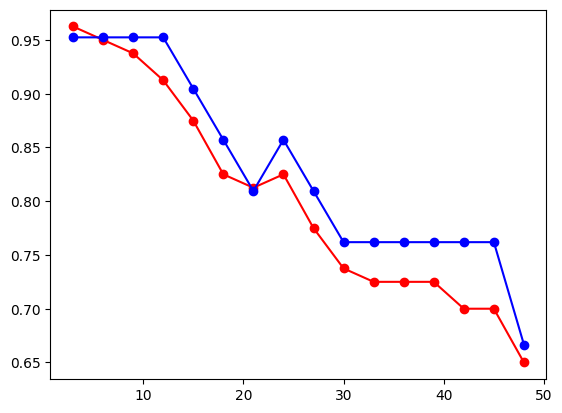

In [37]:
plt.plot(np.arange(3,50,3), [i[0] for i in acc], "ro-")
plt.plot(np.arange(3,50,3), [i[1] for i in acc], "bo-")

In [34]:
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)
accuracy_score(pred, y_test)
pd.crosstab(pred, y_test)

col_0,1,2,6,7
row_0,,,,
1,10,0,0,0
2,0,6,0,0
6,0,0,3,1
7,0,0,0,1


In [35]:
accuracy_score(pred, y_test)

0.9523809523809523